### Generate dataset with given adjacency matrices

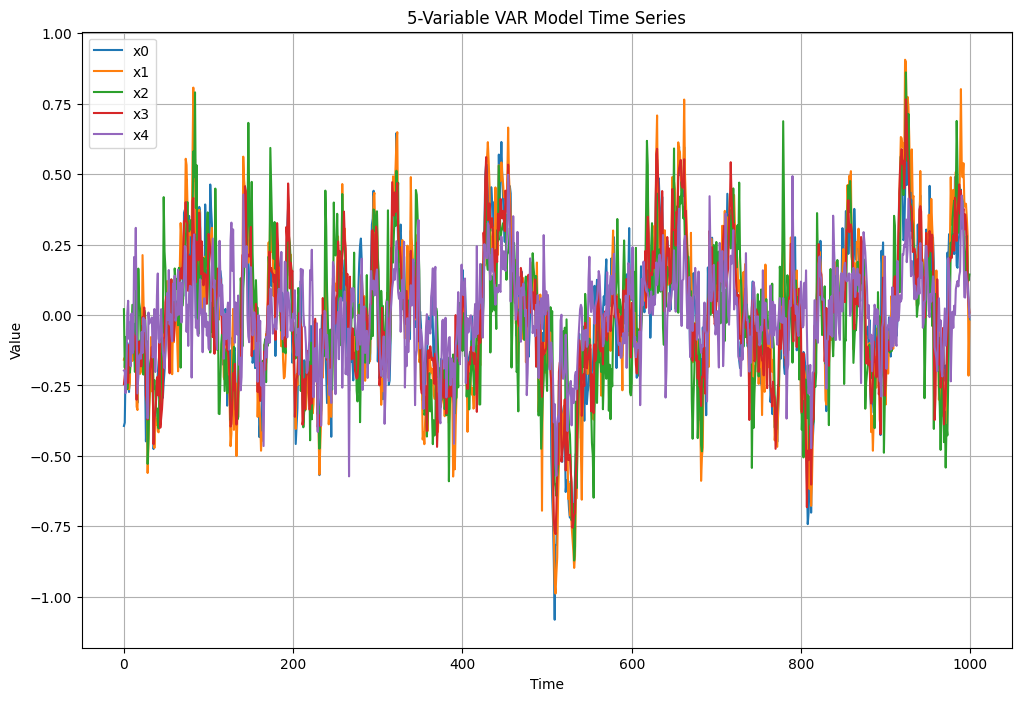

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_var_data(B0, B1, T=1000, T_spurious=20, expon=1.5, error_scale = 0.1, random_state=None):
    np.random.seed(random_state)
    
    n = B0.shape[0]  # 從 B0 矩陣獲取變量數
    
    # 確保 B0 是下三角矩陣
    # B0 = np.tril(B0, k=-1)
    
    # 計算 M1
    M1 = np.dot(np.linalg.inv(np.eye(n) - B0), B1)

    # 生成誤差項
    ee = np.empty((n, T + T_spurious))
    for i in range(n):
        ee[i, :] = np.random.normal(size=(1, T + T_spurious))
        ee[i, :] = np.multiply(np.sign(ee[i, :]), abs(ee[i, :]) ** expon)
        ee[i, :] = ee[i, :] - np.mean(ee[i, :])
        ee[i, :] = ee[i, :] / np.std(ee[i, :])

    std_e = (np.random.uniform(size=(n,)) + 0.5) * error_scale
    nn = np.dot(np.dot(np.linalg.inv(np.eye(n) - B0), np.diag(std_e)), ee)

    # 生成時間序列數據
    xx = np.zeros((n, T + T_spurious))
    xx[:, 0] = np.random.normal(size=(n,))

    for t in range(1, T + T_spurious):
        xx[:, t] = np.dot(M1, xx[:, t - 1]) + nn[:, t]

    # 去除前 T_spurious 個時間點
    data = xx[:, T_spurious:]

    return data


def plot_time_series(data, title="Time Series Plot"):
    plt.figure(figsize=(12, 8))
    for i in range(data.shape[0]):
        plt.plot(data[i, :], label=f'x{i}')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


# 使用示例
# 指定 B0 和 B1 矩陣
B0 = np.array([
    [ 0,    0,    0,    0.7,    0   ],
    [ 0.4,  0,    0.3,    0,    0   ],
    [ 0.1,  0,    0,  0.2,  0   ],
    [-0.2,  0.3,  0,    0,    0   ],
    [ 0,    0.2, -0.1,  0,    0   ]
])

B1 = np.array([
    [ 0.4,  0,   -0.2,  0,    0.1],
    [ 0,    0.3,  0,    0.15, 0  ],
    [-0.1,  0.2,  0.5,  0,    0  ],
    [ 0.2,  0,    0,    0.6, -0.1],
    [ 0,    0,   -0.15, 0.2,  0.4]
])


# 生成數據
data = generate_var_data(B0, B1)

plot_time_series(data, "5-Variable VAR Model Time Series")

# 轉換為 DataFrame 並保存為 CSV
df = pd.DataFrame(data.T, columns=[f"x{i}" for i in range(data.shape[0])])
df.to_csv("test_data.csv", index=False)

### Generate dataset with given adjacency matrices with trend

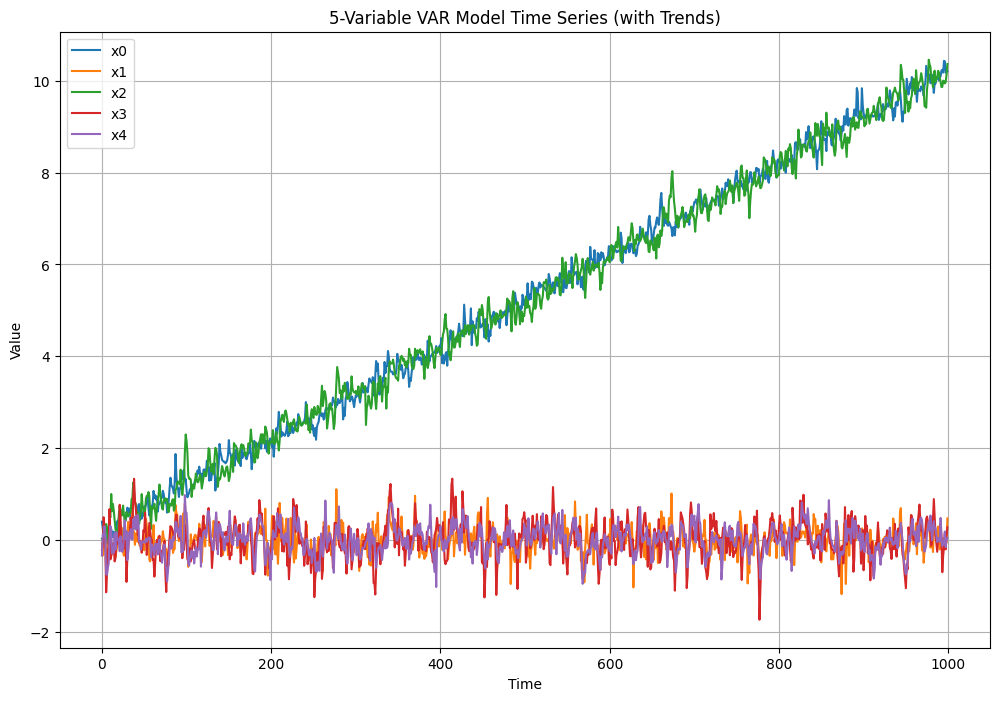

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_var_data(B0, B1, T=1000, T_spurious=20, expon=1.5, error_scale=0.2, trend_vars=None, trend_strength=0.01, random_state=None):
    """
    Generate VAR data with option for non-stationary (trending) variables.
    
    Parameters:
    - B0, B1: Coefficient matrices
    - T: Number of time points
    - T_spurious: Number of initial points to discard
    - expon: Exponent for error term distribution
    - error_scale: Scale of the error terms
    - trend_vars: List of indices for variables that should have a trend
    - trend_strength: Strength of the trend (slope)
    - random_state: Seed for random number generation
    """
    np.random.seed(random_state)
    
    n = B0.shape[0]  # Number of variables
    
    # Ensure B0 is lower triangular
    B0 = np.tril(B0, k=-1)
    
    # Calculate M1
    M1 = np.dot(np.linalg.inv(np.eye(n) - B0), B1)

    # Generate error terms
    ee = np.empty((n, T + T_spurious))
    for i in range(n):
        ee[i, :] = np.random.normal(size=(1, T + T_spurious))
        ee[i, :] = np.multiply(np.sign(ee[i, :]), abs(ee[i, :]) ** expon)
        ee[i, :] = ee[i, :] - np.mean(ee[i, :])
        ee[i, :] = ee[i, :] / np.std(ee[i, :])

    std_e = (np.random.uniform(size=(n,)) + 0.5) * error_scale
    nn = np.dot(np.dot(np.linalg.inv(np.eye(n) - B0), np.diag(std_e)), ee)

    # Generate time series data
    xx = np.zeros((n, T + T_spurious))
    xx[:, 0] = np.random.normal(size=(n,))

    for t in range(1, T + T_spurious):
        xx[:, t] = np.dot(M1, xx[:, t - 1]) + nn[:, t]

    # Add trends to specified variables
    if trend_vars is not None:
        for var in trend_vars:
            trend = np.arange(T + T_spurious) * trend_strength
            xx[var, :] += trend

    # Remove the first T_spurious time points
    data = xx[:, T_spurious:]

    return data


def plot_time_series(data, title="Time Series Plot"):
    plt.figure(figsize=(12, 8))
    for i in range(data.shape[0]):
        plt.plot(data[i, :], label=f'x{i}')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage
B0 = np.array([
    [ 0,    0,    0,    0,    0   ],
    [ 0.4,  0,    0,    0,    0   ],
    [-0.2,  0.3,  0,    0,    0   ],
    [ 0,    0.2, -0.1,  0,    0   ],
    [ 0.1,  0,    0.3,  0.2,  0   ]
])

B1 = np.array([
    [ 0.4,  0,   -0.2,  0,    0.1],
    [ 0,    0.3,  0,    0.15, 0  ],
    [-0.1,  0.2,  0.5,  0,    0  ],
    [ 0.2,  0,    0,    0.6, -0.1],
    [ 0,    0,   -0.15, 0.2,  0.4]
])

# Generate data with trends in variables 0 and 2
data = generate_var_data(B0, B1, trend_vars=[0, 2], trend_strength=0.01)

plot_time_series(data, "5-Variable VAR Model Time Series (with Trends)")

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data.T, columns=[f"x{i}" for i in range(data.shape[0])])
df.to_csv("test_data_with_trends.csv", index=False)

### Generate dataset with given adjacency matrices with trend and seasonality

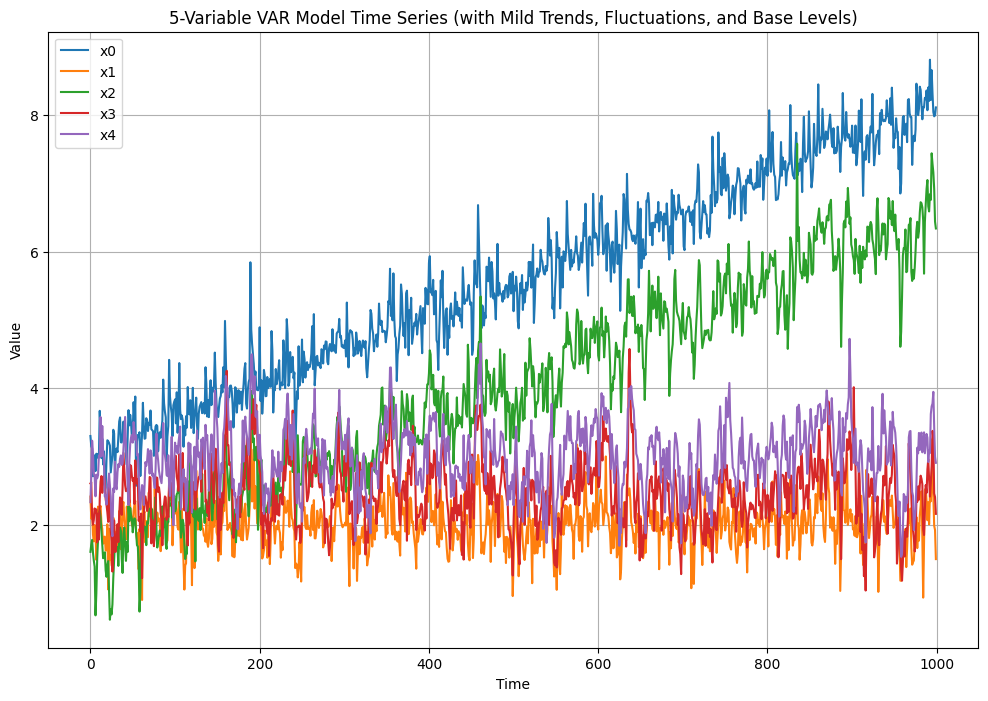

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_var_data(B0, B1, T=1000, T_spurious=20, expon=1.5, error_scale=0.2, 
                      trend_vars=None, trend_strength=0.005, 
                      fluctuation_vars=None, fluctuation_scale=0.02, 
                      base_levels=None, random_state=None):
    """
    Generate VAR data with option for non-stationary (trending) variables, mild non-periodic fluctuations, and base levels.
    
    Parameters:
    - B0, B1: Coefficient matrices
    - T: Number of time points
    - T_spurious: Number of initial points to discard
    - expon: Exponent for error term distribution
    - error_scale: Scale of the error terms
    - trend_vars: List of indices for variables that should have a trend
    - trend_strength: Strength of the trend (slope)
    - fluctuation_vars: List of indices for variables that should have fluctuations
    - fluctuation_scale: Scale of the random walk fluctuations
    - base_levels: List of base level values for each variable
    - random_state: Seed for random number generation
    """
    np.random.seed(random_state)
    
    n = B0.shape[0]  # Number of variables
    
    # Ensure B0 is lower triangular
    B0 = np.tril(B0, k=-1)
    
    # Calculate M1
    M1 = np.dot(np.linalg.inv(np.eye(n) - B0), B1)

    # Generate error terms
    ee = np.empty((n, T + T_spurious))
    for i in range(n):
        ee[i, :] = np.random.normal(size=(1, T + T_spurious))
        ee[i, :] = np.multiply(np.sign(ee[i, :]), abs(ee[i, :]) ** expon)
        ee[i, :] = ee[i, :] - np.mean(ee[i, :])
        ee[i, :] = ee[i, :] / np.std(ee[i, :])

    std_e = (np.random.uniform(size=(n,)) + 0.5) * error_scale
    nn = np.dot(np.dot(np.linalg.inv(np.eye(n) - B0), np.diag(std_e)), ee)

    # Generate time series data
    xx = np.zeros((n, T + T_spurious))
    
    # Set initial values to base levels or random if not provided
    if base_levels is not None:
        xx[:, 0] = base_levels
    else:
        xx[:, 0] = np.random.normal(size=(n,))

    for t in range(1, T + T_spurious):
        xx[:, t] = np.dot(M1, xx[:, t - 1]) + nn[:, t]

    # Add trends to specified variables
    if trend_vars is not None:
        for var in trend_vars:
            trend = np.arange(T + T_spurious) * trend_strength
            xx[var, :] += trend

    # Add mild non-periodic fluctuations to specified variables
    if fluctuation_vars is not None:
        for var in fluctuation_vars:
            fluctuation = np.cumsum(np.random.normal(0, fluctuation_scale, T + T_spurious))
            xx[var, :] += fluctuation

    # Add base levels
    if base_levels is not None:
        for i, level in enumerate(base_levels):
            xx[i, :] += level

    # Remove the first T_spurious time points
    data = xx[:, T_spurious:]

    return data

def plot_time_series(data, title="Time Series Plot"):
    plt.figure(figsize=(12, 8))
    for i in range(data.shape[0]):
        plt.plot(data[i, :], label=f'x{i}')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
B0 = np.array([
    [0, 0, 0, 0, 0],
    [0.5, 0, 0, 0, 0],
    [0.3, 0.2, 0, 0, 0],
    [0, 0.4, 0.1, 0, 0],
    [0.2, 0, 0.3, 0.1, 0]
])

B1 = np.array([
    [0.4, 0, 0, 0, 0],
    [0.1, 0.3, 0, 0, 0],
    [0, 0.2, 0.5, 0, 0],
    [0, 0, 0.1, 0.6, 0],
    [0.1, 0, 0, 0.2, 0.4]
])

# Generate data with trends in variables 0 and 2, fluctuations in variables 2 and 3, and specific base levels
data = generate_var_data(B0, B1, 
                         trend_vars=[0, 2], 
                         trend_strength=0.005,  # Reduced trend strength
                         fluctuation_vars=[2, 3],
                         fluctuation_scale=0.001,  # Reduced fluctuation scale
                         base_levels=[3.0, 2, 1.5, 2.5, 3.0],  # Set base levels for each variable
                         T=1000,
                         random_state=42)

plot_time_series(data, "5-Variable VAR Model Time Series (with Mild Trends, Fluctuations, and Base Levels)")

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data.T, columns=[f"x{i}" for i in range(data.shape[0])])
df.to_csv("test_data_with_trends_random.csv", index=False)

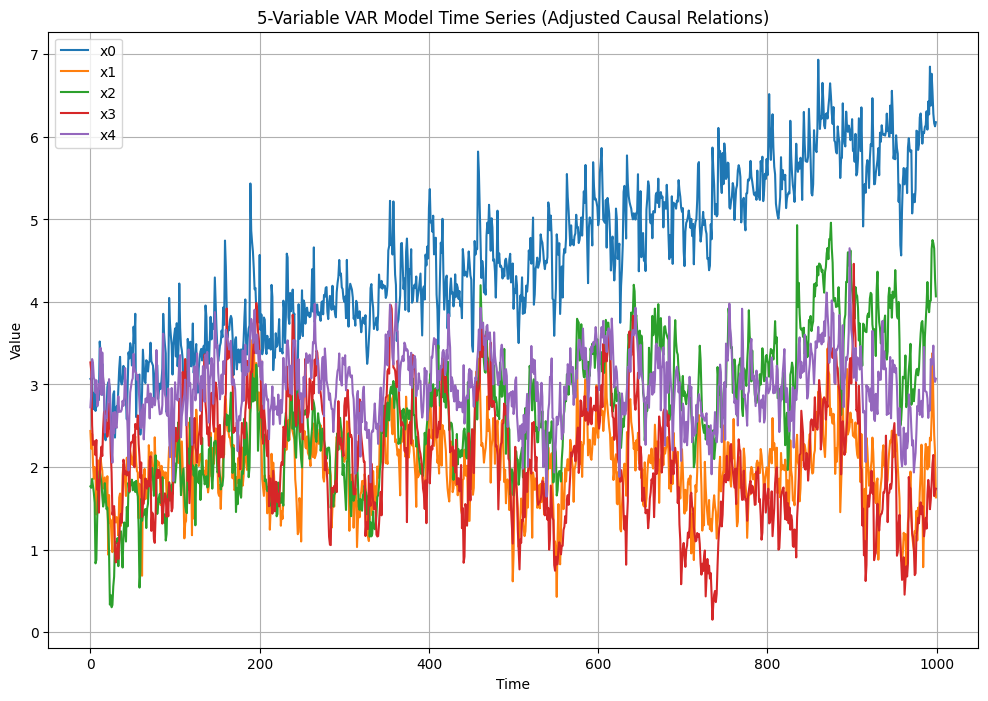

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_var_data(B0, B1, T=1000, T_spurious=20, expon=1.5, error_scale=0.2, 
                      trend_vars=None, trend_strength=0.005, 
                      fluctuation_vars=None, fluctuation_scale=0.02, 
                      base_levels=None, random_state=None):
    """
    Generate VAR data with option for non-stationary (trending) variables, non-periodic fluctuations, and base levels.
    """
    np.random.seed(random_state)
    
    n = B0.shape[0]  # Number of variables
    
    # Ensure B0 is lower triangular
    B0 = np.tril(B0, k=-1)
    
    # Calculate M1
    M1 = np.dot(np.linalg.inv(np.eye(n) - B0), B1)

    # Generate error terms
    ee = np.empty((n, T + T_spurious))
    for i in range(n):
        ee[i, :] = np.random.normal(size=(1, T + T_spurious))
        ee[i, :] = np.multiply(np.sign(ee[i, :]), abs(ee[i, :]) ** expon)
        ee[i, :] = ee[i, :] - np.mean(ee[i, :])
        ee[i, :] = ee[i, :] / np.std(ee[i, :])

    std_e = (np.random.uniform(size=(n,)) + 0.5) * error_scale
    nn = np.dot(np.dot(np.linalg.inv(np.eye(n) - B0), np.diag(std_e)), ee)

    # Generate time series data
    xx = np.zeros((n, T + T_spurious))
    
    # Set initial values to base levels or random if not provided
    if base_levels is not None:
        xx[:, 0] = base_levels
    else:
        xx[:, 0] = np.random.normal(size=(n,))

    for t in range(1, T + T_spurious):
        xx[:, t] = np.dot(M1, xx[:, t - 1]) + nn[:, t]

    # Add trends to specified variables
    if trend_vars is not None:
        for var in trend_vars:
            trend = np.arange(T + T_spurious) * trend_strength
            xx[var, :] += trend

    # Add non-periodic fluctuations to specified variables
    if fluctuation_vars is not None:
        for var in fluctuation_vars:
            fluctuation = np.cumsum(np.random.normal(0, fluctuation_scale, T + T_spurious))
            xx[var, :] += fluctuation

    # Add base levels
    if base_levels is not None:
        for i, level in enumerate(base_levels):
            xx[i, :] += level

    # Remove the first T_spurious time points
    data = xx[:, T_spurious:]

    return data

def plot_time_series(data, title="Time Series Plot"):
    plt.figure(figsize=(12, 8))
    for i in range(data.shape[0]):
        plt.plot(data[i, :], label=f'x{i}')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# 調整後的 B0 和 B1，增加了一些因果關係
B0 = np.array([
    [0,   0,   0,   0,   0  ],
    [0.4, 0,   0,   0,   0  ],
    [0,   0.3, 0,   0,   0  ],
    [0.1, 0,   0.2, 0,   0  ],
    [0.2, 0,   0.,  0.1, 0  ]
])

B1 = np.array([
    [0.6, 0,   0.1, 0,   0  ],
    [0,   0.5, 0,   0.1, 0  ],
    [0,   0,   0.7, 0,   0  ],
    [0,   0,   0,   0.8, 0  ],
    [0,   0,   0.2, 0,   0.4]
])

# 生成數據
data = generate_var_data(B0, B1, 
                         trend_vars=[0, 2], 
                         trend_strength=0.003,
                         fluctuation_vars=[2, 3],
                         fluctuation_scale=0.01,
                         base_levels=[3.0, 2.0, 1.5, 2.5, 3.0],
                         T=1000,
                         random_state=42)

plot_time_series(data, "5-Variable VAR Model Time Series (Adjusted Causal Relations)")

# 轉換為 DataFrame 並保存為 CSV
df = pd.DataFrame(data.T, columns=[f"x{i}" for i in range(data.shape[0])])
df.to_csv("test_data_adjusted_causal_relations.csv", index=False)